# Computing ruin probability in a multiparty slashing system

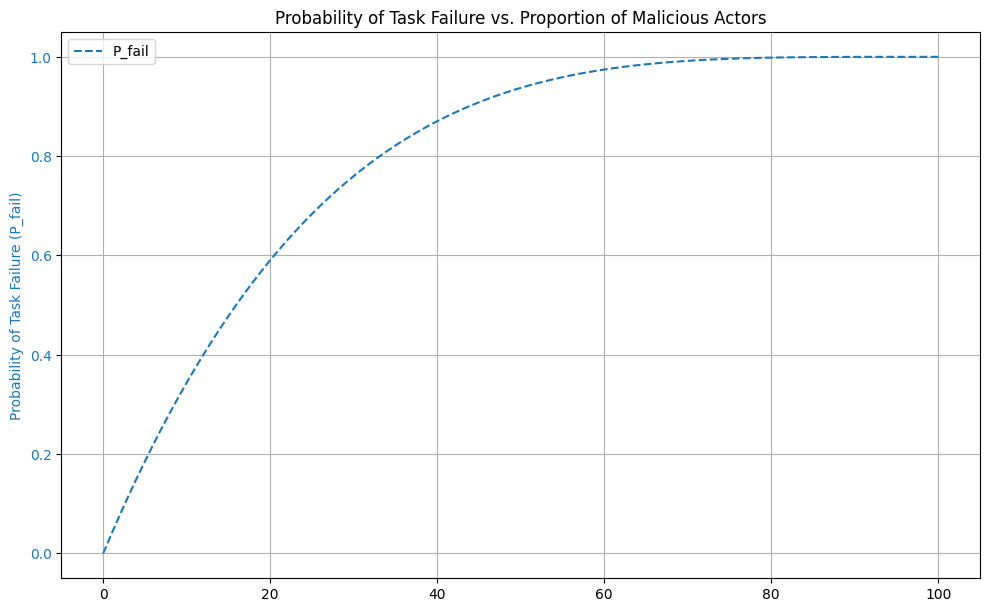

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
T = 1000          # Total number of tasks
S = 1000           # Initial stake for each actor
L = 10            # Loss per failed task
ratios = np.linspace(0, 1, 101)  # Ratios of malicious actors from 0% to 100%
N_max_fail = S // L  # Max number of failed tasks before ruin

# Calculate ruin probabilities and Pfail
ruin_probabilities = []
P_fail_values = []

for p in ratios:
    P_fail = 1 - (1 - p)**4  # Probability of task failure
    P_fail_values.append(P_fail)
    # Ruin probability: 1 - CDF of the binomial distribution
    P_ruin = 1 - binom.cdf(N_max_fail, T, P_fail)
    ruin_probabilities.append(P_ruin)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_ylabel('Probability of Task Failure (P_fail)', color=color)
ax1.plot(ratios * 100, P_fail_values, color=color, linestyle='dashed', label='P_fail')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Probability of Task Failure vs. Proportion of Malicious Actors')
plt.grid(True)
plt.show()
